In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tqdm import tqdm
from data_prep import utils
from scipy.interpolate import interp1d

# suppress warnings from pandas printing Nan and inf
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [110]:
data = pd.read_excel('dataset/SAP_Datasets.xlsx')
data.head()

,Country Name,Country Code,Indicator Name,Topic,short description,long description,Indicator Code,Unit of measure,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,Africa Eastern and Southern,AFE,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.271724,NaN,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,Africa Western and Central,AFW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.197514,NaN,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN


In [111]:
indicator_names = data[['Indicator Code', 'Indicator Name']].drop_duplicates()
indicator_map = dict(zip(indicator_names['Indicator Code'], indicator_names['Indicator Name']))
indicator_names = data[['Indicator Code', 'Indicator Name', 'Topic']].drop_duplicates()
indicator_names.set_index('Indicator Code')

country_names = data[['Country Name', 'Country Code']].drop_duplicates()
country_map = dict(zip(country_names['Country Code'], country_names['Country Name']))

In [112]:
table = utils.create_pair_df(data)
table.head()

CC.EST  DT.TDS.MLAT.PG.ZS  EG.CFT.ACCS.RU.ZS  \
Country Year                                                   
ABW     2000       NaN                NaN                NaN   
        2001       NaN                NaN                NaN   
        2002       NaN                NaN                NaN   
        2003       NaN                NaN                NaN   
        2004  1.165965                NaN                NaN   

              EG.CFT.ACCS.UR.ZS  EG.CFT.ACCS.ZS  EG.ELC.ACCS.RU.ZS  \
Country Year                                                         
ABW     2000                NaN             NaN              100.0   
        2001                NaN             NaN              100.0   
        2002                NaN             NaN              100.0   
        2003                NaN             NaN              100.0   
        2004                NaN             NaN              100.0   

              EG.ELC.ACCS.UR.ZS  EG.ELC.ACCS.ZS  GC.XPN.COMP.CN  \
Country Year                                                      
ABW     2000              100.0            91.7             NaN   
        2001              100.0           100.0             NaN   
        2002              100.0           100.0             NaN   
        2003              100.0           100.0             NaN   
        2004              100.0           100.0             NaN   

              GC.XPN.COMP.ZS  ...  SP.DYN.CBRT.IN  SP.DYN.WFRT  \
Country Year                  ...                                
ABW     2000             NaN  ...          14.427          NaN   
        2001             NaN  ...          13.739          NaN   
        2002             NaN  ...          12.992          NaN   
        2003             NaN  ...          12.621          NaN   
        2004             NaN  ...          11.921          NaN   

              SP.M15.2024.FE.ZS  SP.M18.2024.FE.ZS  SP.MTR.1519.ZS  \
Country Year                                                         
ABW     2000                NaN                NaN             NaN   
        2001                NaN                NaN             NaN   
        2002                NaN                NaN             NaN   
        2003                NaN                NaN             NaN   
        2004                NaN                NaN             NaN   

              SP.POP.DPND  SP.POP.DPND.OL  SP.POP.DPND.YG  SP.POP.TOTL  \
Country Year                                                             
ABW     2000    43.214659        9.909186       33.305473          NaN   
        2001    42.917251       10.217943       32.699308          NaN   
        2002    42.714310       10.598498       32.115812          NaN   
        2003    42.456933       10.970756       31.486177          NaN   
        2004    42.171019       11.364258       30.806760          NaN   

              SP.URB.TOTL.IN.ZS  
Country Year                     
ABW     2000             46.717  
        2001             46.339  
        2002             45.972  
        2003             45.606  
        2004             45.240  

[5 rows x 88 columns]

In [113]:
can_data = table.loc['CAN'].reset_index()
can_data.head()

,Year,CC.EST,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,GC.XPN.COMP.CN,...,SP.DYN.CBRT.IN,SP.DYN.WFRT,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SP.MTR.1519.ZS,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,2000,2.049319,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.152600e+10,...,10.7,NaN,NaN,NaN,NaN,46.344626,18.275169,28.069457,NaN,79.478
1,2001,NaN,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.097900e+10,...,10.8,NaN,NaN,NaN,NaN,45.896323,18.350877,27.545446,NaN,79.810
2,2002,1.982231,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.320800e+10,...,10.5,NaN,NaN,NaN,NaN,45.466598,18.418634,27.047964,NaN,79.888
3,2003,1.931292,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.459500e+10,...,10.6,NaN,NaN,NaN,NaN,45.074678,18.506633,26.568045,NaN,79.967
4,2004,1.805866,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.515600e+10,...,10.6,NaN,NaN,NaN,NaN,44.673742,18.613734,26.060008,NaN,80.045


In [114]:
rus_data = table.loc['RUS'].reset_index()
chad_data = table.loc['TCD'].reset_index()
hic_data = table.loc['HIC'].reset_index()
yem_data = table.loc['YEM'].reset_index()

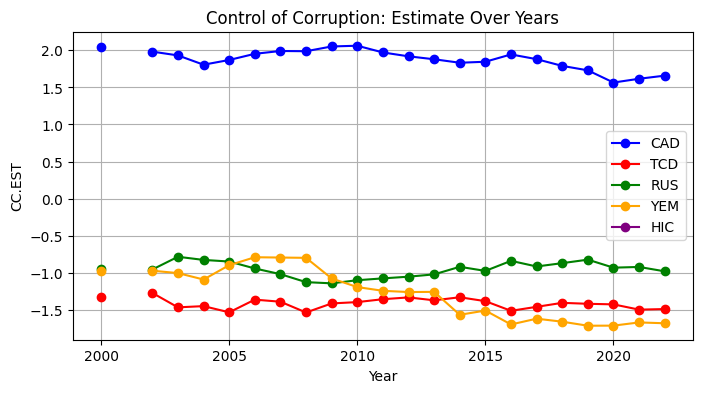

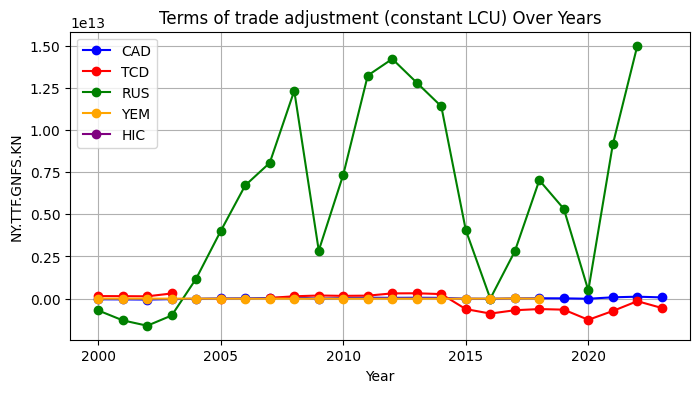

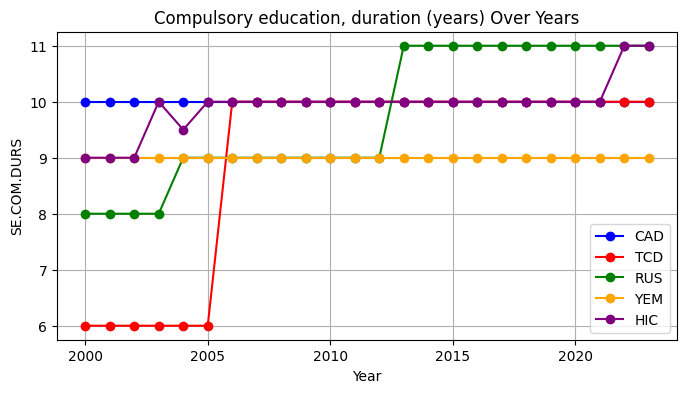

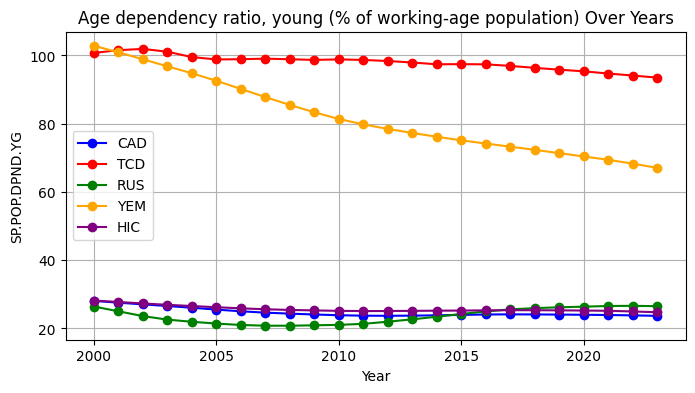

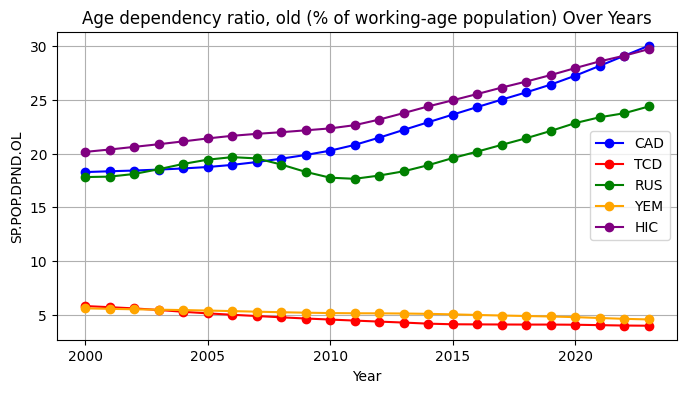

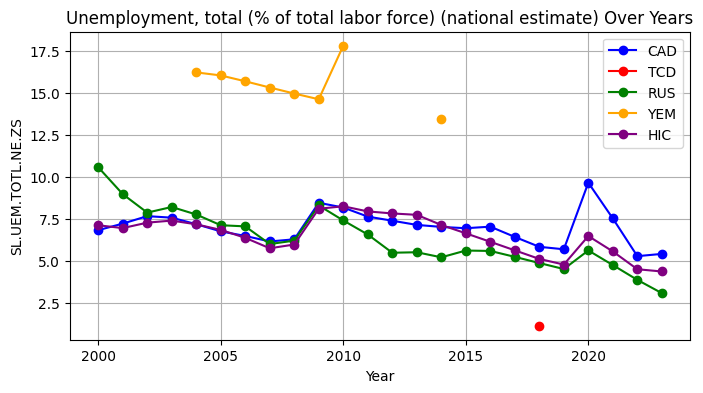

In [115]:
# lets plot some data from countries with different financial situation
looking = ["CC.EST", "NY.TTF.GNFS.KN", "SE.COM.DURS", "SP.POP.DPND.YG", "SP.POP.DPND.OL", "SL.UEM.TOTL.NE.ZS"]
for column in looking:
    plt.figure(figsize=(8, 4))
    plt.plot(can_data['Year'], can_data[column], marker='o', linestyle='-', label='CAD', color='blue')
    plt.plot(chad_data['Year'], chad_data[column], marker='o', linestyle='-', label='TCD', color='red')
    plt.plot(chad_data['Year'], rus_data[column], marker='o', linestyle='-', label='RUS', color='green')
    plt.plot(chad_data['Year'], yem_data[column], marker='o', linestyle='-', label='YEM', color='orange')
    plt.plot(hic_data['Year'], hic_data[column], marker='o', linestyle='-', label='HIC', color='purple')
    
    
    # Labels and title
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(f"{indicator_map[column]} Over Years")
    plt.legend()
    plt.grid(True)
    
    # Show each plot separately
    plt.show()


## Seperate aggeregate values

In [116]:
aggregate_regions = [
    "AFE", "AFW", "ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS", "EMU", "EUU", 
    "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB", "IDX", "INX", "LAC", "LCN", "LDC", 
    "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PSS", "PRE", 
    "PST", "SAS", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD"
]

aggeregate_table = table[table.index.get_level_values('Country').isin(aggregate_regions)]
table = table[~table.index.get_level_values('Country').isin(aggregate_regions)]

# Dealing with missing values
lets check what percentage of our table contains missing data:

In [117]:
print(table.isna().sum().sum() / (table.shape[0] * table.shape[1]))

0.5502963098729228


Nearly half of our table contains NaN values. how might we deal with this issue?

## Removing Countries with lots of missing data

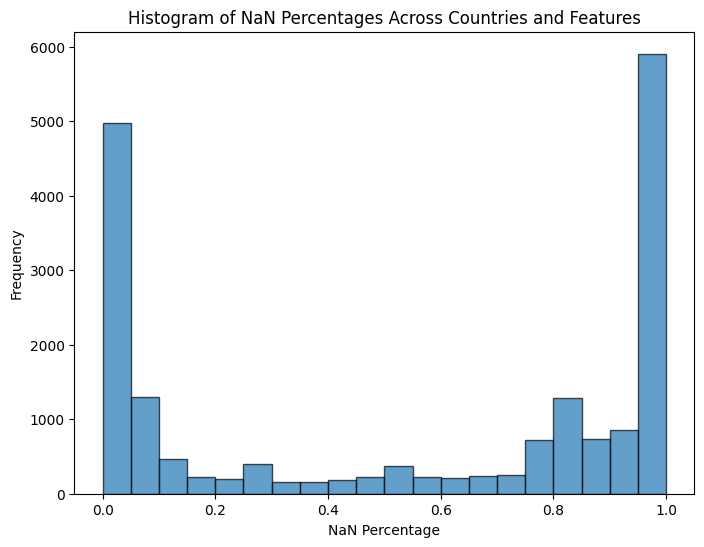

In [118]:
nan_percentage = table.isna().groupby("Country").sum() / 24
all_nan_percentages = nan_percentage.values.flatten()
plt.figure(figsize=(8,6))
plt.hist(all_nan_percentages, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("NaN Percentage")
plt.ylabel("Frequency")
plt.title("Histogram of NaN Percentages Across Countries and Features")
plt.show()

In [119]:
high_nan_counts = (nan_percentage >= 0.1).sum(axis=1).sort_values(ascending=False) / len(table.columns) * 100
country_removal = high_nan_counts[high_nan_counts >= 80.0]
for i in country_removal.index:
    print(i, country_removal[i] // 0.1 / 10, country_map[i])

XKX 93.1 Kosovo
ASM 90.9 American Samoa
SXM 89.7 Sint Maarten (Dutch part)
FRO 88.6 Faroe Islands
GRL 88.6 Greenland
MAF 88.6 St. Martin (French part)
IMN 88.6 Isle of Man
CUW 88.6 Curacao
TCA 88.6 Turks and Caicos Islands
VGB 87.4 British Virgin Islands
MNP 87.4 Northern Mariana Islands
GIB 86.3 Gibraltar
ABW 86.3 Aruba
BMU 84.0 Bermuda
CYM 84.0 Cayman Islands
LIE 82.9 Liechtenstein
CHI 82.9 Channel Islands
SMR 82.9 San Marino
NRU 82.9 Nauru
SSD 81.8 South Sudan
MCO 81.8 Monaco
VIR 81.8 Virgin Islands (U.S.)
FSM 81.8 Micronesia, Fed. Sts.
KNA 81.8 St. Kitts and Nevis
GRD 80.6 Grenada
TUV 80.6 Tuvalu


In [120]:
table = table[~table.index.get_level_values("Country").isin(country_removal.index)]

## Filling the values inside of the table for the remaining columns

In [121]:
can_data = table.loc['CAN'].reset_index()
can_data.head()

,Year,CC.EST,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,GC.XPN.COMP.CN,...,SP.DYN.CBRT.IN,SP.DYN.WFRT,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SP.MTR.1519.ZS,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,2000,2.049319,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.152600e+10,...,10.7,NaN,NaN,NaN,NaN,46.344626,18.275169,28.069457,NaN,79.478
1,2001,NaN,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.097900e+10,...,10.8,NaN,NaN,NaN,NaN,45.896323,18.350877,27.545446,NaN,79.810
2,2002,1.982231,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.320800e+10,...,10.5,NaN,NaN,NaN,NaN,45.466598,18.418634,27.047964,NaN,79.888
3,2003,1.931292,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.459500e+10,...,10.6,NaN,NaN,NaN,NaN,45.074678,18.506633,26.568045,NaN,79.967
4,2004,1.805866,NaN,100.0,100.0,100.0,100.0,100.0,100.0,2.515600e+10,...,10.6,NaN,NaN,NaN,NaN,44.673742,18.613734,26.060008,NaN,80.045


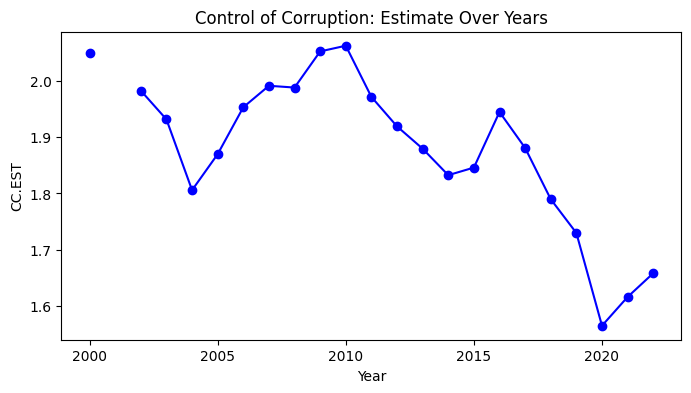

In [122]:
column = 'CC.EST'

plt.figure(figsize=(8, 4))
plt.plot(can_data['Year'], can_data[column], marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel(column)
plt.title(f"{indicator_map[column]} Over Years")

plt.show()

## Looking at the data, majority of the data missing is for the year 2023. lets keep those data points in a seperate table for now

In [123]:
table2023 = table[table.index.get_level_values("Year")== 2023]
table = table[table.index.get_level_values("Year") != 2023]

## Now we will use linear interpolation to fill in the missing values!

In [124]:
u = utils.interpolate_missing_points(table, column, 'CAN')


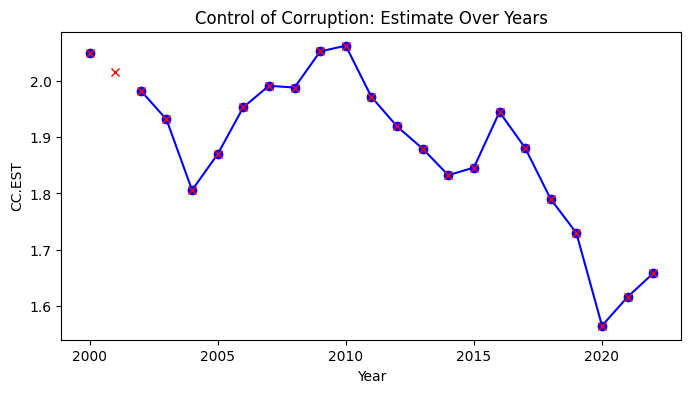

In [125]:
can_dataU = u.loc['CAN'].reset_index()


plt.figure(figsize=(8, 4))
plt.plot(can_data['Year'], can_data[column], marker='o', linestyle='-', color='blue')
plt.plot(can_dataU['Year'], can_dataU[column], marker='x', linestyle=' ', color='red')
plt.xlabel("Year")
plt.ylabel(column)
plt.title(f"{indicator_map[column]} Over Years")

plt.show()

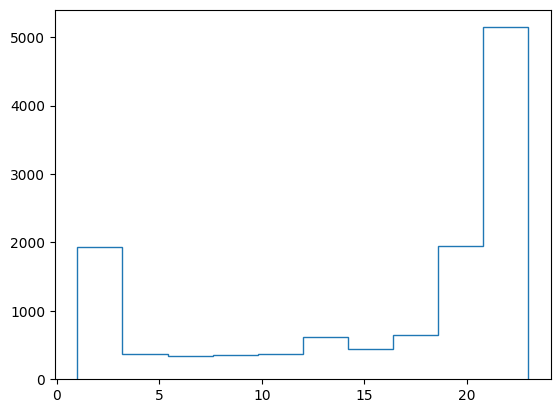

In [126]:
nan_counts = (table.reset_index()
                    .groupby("Country", group_keys=False)
                    .apply(lambda df: df.isna().sum(),  include_groups=False)
                    .drop(columns=["Year"]))

valid_pairs = nan_counts.stack().reset_index()
valid_pairs.columns = ["Country", "Feature", "NaN_Count"]
valid_pairs = valid_pairs[valid_pairs["NaN_Count"] > 0]
plt.stairs(*np.histogram(valid_pairs["NaN_Count"]))
plt.show()
valid_pairs = valid_pairs[valid_pairs["NaN_Count"] <3 ]

In [127]:
interpolated_table = table.copy()
for _, row in tqdm(valid_pairs.iterrows(), total=len(valid_pairs), desc="Interpolating points"):
    c = row["Country"]
    f = row["Feature"]
    interpolated_table = utils.interpolate_missing_points(interpolated_table, f, c)

Interpolating points: 100%|██████████| 1736/1736 [00:00<00:00, 2899.37it/s]


### now lets recheck the missing data percentage

In [128]:
print(interpolated_table.isna().sum().sum() / (table.shape[0] * table.shape[1]))

0.493778842373197


In [129]:
interpolated_table.to_csv('created_datasets/cleaned.csv')

## need a more rigorous method for detecting interpolation points
**idea: check if a in any interval, if begining and end of the interval values are present (interval length = 4)**

In [130]:
nan_interval_table = table.groupby("Country").apply(utils.find_nan_intervals).reset_index()

/Users/matthew4.tch/Documents/dev/cxc-hackathon-2025/data_prep/utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v  = vals[i]


In [131]:
nan_interval_table.head()

,Country,CC.EST,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,GC.XPN.COMP.CN,...,SP.DYN.CBRT.IN,SP.DYN.WFRT,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SP.MTR.1519.ZS,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,AFG,"[(2001, 2002)]","[(2000, 2006)]",[],[],[],"[(2000, 2003)]",[],[],"[(2000, 2006)]",...,[],"[(2000, 2015)]","[(2000, 2015)]","[(2000, 2015)]","[(2000, 2015)]",[],[],[],[],[]
1,AGO,"[(2001, 2002)]",[],[],[],[],"[(2007, 2008), (2009, 2015), (2016, 2018)]",[],[],[],...,[],"[(2000, 2016)]","[(2000, 2016)]","[(2000, 2016)]","[(2000, 2007), (2008, 2011), (2012, 2016)]",[],[],[],[],[]
2,ALB,"[(2001, 2002)]",[],[],[],[],[],[],[],"[(2000, 2002), (2005, 2011)]",...,[],"[(2000, 2009), (2010, 2018)]","[(2000, 2009), (2010, 2018)]","[(2000, 2009), (2010, 2018)]","[(2000, 2009), (2010, 2018)]",[],[],[],[],[]
3,AND,"[(2001, 2002)]",[],[],[],[],[],[],[],[],...,"[(2011, 2012), (2013, 2016), (2017, 2018), (20...",[],[],[],[],[],[],[],[],[]
4,ARE,"[(2001, 2002)]",[],[],[],[],[],[],[],"[(2000, 2011)]",...,[],[],[],[],[],[],[],[],[],[]


### lets look at how length of intervals are distributed

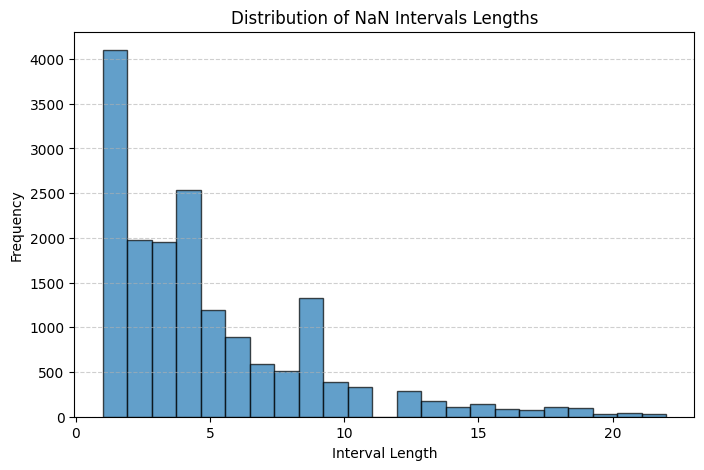

In [132]:
interval_lengths = []

for _, row in nan_interval_table.iterrows():
    for col in nan_interval_table.columns[1:]:
        intervals = row[col]
        if isinstance(intervals, list):
            for start, end in intervals:
                interval_lengths.append(end - start)


plt.figure(figsize=(8, 5))
plt.hist(interval_lengths, bins=23, edgecolor='black', alpha=0.7)
plt.xlabel("Interval Length")
plt.ylabel("Frequency")
plt.title("Distribution of NaN Intervals Lengths")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

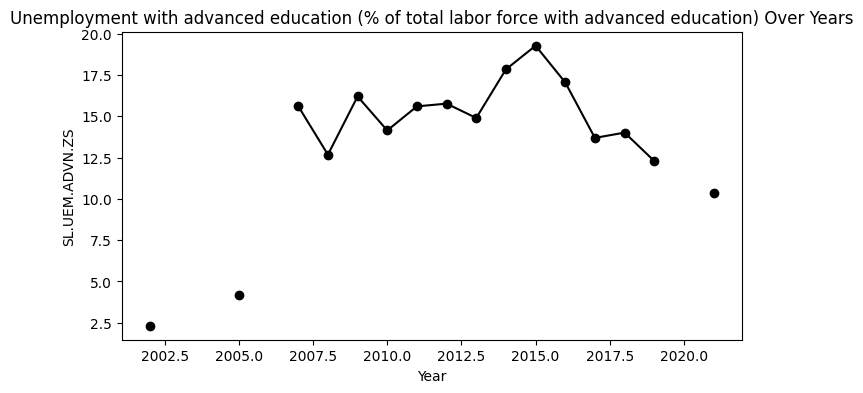

In [133]:
alb_data = table.loc['ALB'].reset_index()

column = 'SL.UEM.ADVN.ZS'

plt.figure(figsize=(8, 4))
plt.plot(alb_data['Year'], alb_data[column], marker='o', linestyle='-', color='black')
plt.xlabel("Year")
plt.ylabel(column)
plt.title(f"{indicator_map[column]} Over Years")

plt.show()

In [134]:
u = utils.interpolate_missing_intervals(table, column, 'ALB', 4)


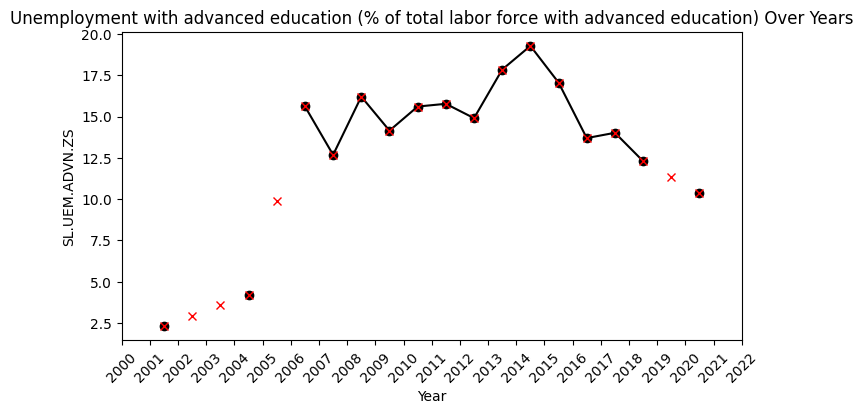

In [135]:
alb_dataU = u.loc['ALB'].reset_index()

column = 'SL.UEM.ADVN.ZS'

plt.figure(figsize=(8, 4))
plt.plot(alb_data['Year'], alb_data[column], marker='o', linestyle='-', color='black')
plt.plot(alb_dataU['Year'], alb_dataU[column], marker='x', linestyle=' ', color='red')
plt.xlabel("Year")

all_years = np.arange(alb_data['Year'].min(), alb_data['Year'].max() + 1)
plt.xticks(all_years + 0.5, all_years, rotation=45)
plt.ylabel(column)
plt.title(f"{indicator_map[column]} Over Years")

plt.show()

In [137]:
table = utils.interpolate_all_missing_intervals(table, l=4)
print(table.isna().sum().sum() / (table.shape[0] * table.shape[1]))

NameError: name 'tqdm' is not defined

### Education/Economics Analysis
below are the topics in Education and Economics, major factors that showcase the financial situations of countries
the education category has a lot of missing data

In [138]:
education_topics = indicator_names[indicator_names['Topic'].str.contains("Education", na=False)]['Topic'].drop_duplicates().values
print(education_topics)

econ_topics = indicator_names[indicator_names['Topic'].str.contains("Economic", na=False)]['Topic'].drop_duplicates().values
print(econ_topics)

edu_ind = indicator_names[indicator_names['Topic'].str.contains("Education", na=False)]['Indicator Code'].drop_duplicates().values
econ_ind = indicator_names[indicator_names['Topic'].str.contains("Economic", na=False)]['Indicator Code'].drop_duplicates().values

e_table = table[table.columns.intersection(edu_ind.tolist())]
e_table.head()

['Education: Outcomes' 'Education: Participation' 'Education: Inputs']
['Economic Policy & Debt: External debt: Debt ratios & other items'
 'Economic Policy & Debt: National accounts: Adjusted savings & income'
 'Economic Policy & Debt: National accounts: Local currency at constant prices: Other items'
 'Social Protection & Labor: Economic activity']


SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
Country Year                                               
AFG     2000                   NaN                   NaN   
        2001                   NaN                   NaN   
        2002                   NaN                   NaN   
        2003                   NaN                   NaN   
        2004                   NaN                   NaN   

              SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
Country Year                                                               
AFG     2000                   NaN                NaN                NaN   
        2001                   NaN                NaN                NaN   
        2002                   NaN                NaN                NaN   
        2003                   NaN                NaN                NaN   
        2004                   NaN                NaN                NaN   

              SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
Country Year                                                   
AFG     2000                NaN             NaN          6.0   
        2001                NaN             NaN          6.0   
        2002                NaN             NaN          6.0   
        2003                NaN             NaN          6.0   
        2004                NaN             NaN          6.0   

              SE.ENR.PRIM.FM.ZS  SE.ENR.SECO.FM.ZS  ...  SE.PRM.UNER.FE.ZS  \
Country Year                                        ...                      
AFG     2000            0.00000                NaN  ...                NaN   
        2001            0.00000            0.00000  ...                NaN   
        2002            0.45693                NaN  ...                NaN   
        2003            0.56220            0.35076  ...                NaN   
        2004            0.43282            0.20961  ...                NaN   

              SE.PRM.UNER.MA  SE.PRM.UNER.MA.ZS  SE.PRM.UNER.ZS  \
Country Year                                                      
AFG     2000             NaN                NaN             NaN   
        2001             NaN                NaN             NaN   
        2002             NaN                NaN             NaN   
        2003             NaN                NaN             NaN   
        2004             NaN                NaN             NaN   

              SE.SEC.UNER.LO.FE.ZS  SE.SEC.UNER.LO.MA.ZS  SE.SEC.UNER.LO.ZS  \
Country Year                                                                  
AFG     2000                   NaN                   NaN                NaN   
        2001                   NaN                   NaN                NaN   
        2002                   NaN                   NaN                NaN   
        2003                   NaN                   NaN                NaN   
        2004                   NaN                   NaN                NaN   

              SE.XPD.PRIM.ZS  SE.XPD.SECO.ZS  SE.XPD.TERT.ZS  
Country Year                                                  
AFG     2000             NaN             NaN             NaN  
        2001             NaN             NaN             NaN  
        2002             NaN             NaN             NaN  
        2003             NaN             NaN             NaN  
        2004             NaN             NaN             NaN  

[5 rows x 23 columns]

In [139]:
print(e_table.isna().sum().sum() / e_table.shape[0] / e_table.shape[1])
print(e_table.shape)

0.5671176476410099
(4393, 23)


In [140]:
mean_table = e_table.groupby("Country").mean(numeric_only=True)
# mean_table = mean_table.fillna(0)
mean_table.head()

,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.SECO.FM.ZS,...,SE.PRM.UNER.FE.ZS,SE.PRM.UNER.MA,SE.PRM.UNER.MA.ZS,SE.PRM.UNER.ZS,SE.SEC.UNER.LO.FE.ZS,SE.SEC.UNER.LO.MA.ZS,SE.SEC.UNER.LO.ZS,SE.XPD.PRIM.ZS,SE.XPD.SECO.ZS,SE.XPD.TERT.ZS
Country,,,,,,,,,,,,,,,,,,,,,
AFG,34.225646,0.487704,71.174338,55.753152,19.809310,48.740265,34.357446,7.956522,0.572764,0.442298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.815880,24.791025,11.813665
AGO,71.489082,0.841797,84.846438,77.641874,56.700567,81.898008,68.611844,5.391304,0.844142,0.739846,...,20.795702,116047.000000,6.249840,13.524570,30.344077,11.811917,21.099510,33.966135,48.820975,8.492410
ALB,99.011978,1.004544,98.498987,98.721279,96.612328,98.310915,97.448778,8.478261,1.016350,0.986475,...,6.911620,2602.250000,3.163730,1.953161,5.576418,1.379902,2.383539,57.187300,22.086275,20.258418
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,...,8.249548,176.444444,7.308144,22.486803,8.909624,7.797243,8.340921,25.393586,23.200696,5.109971
ARE,98.841721,1.011622,97.708263,98.174530,95.837772,96.335554,96.057032,8.869565,1.003700,0.969160,...,7.004088,17408.666667,11.032679,6.576098,NaN,NaN,NaN,NaN,NaN,NaN


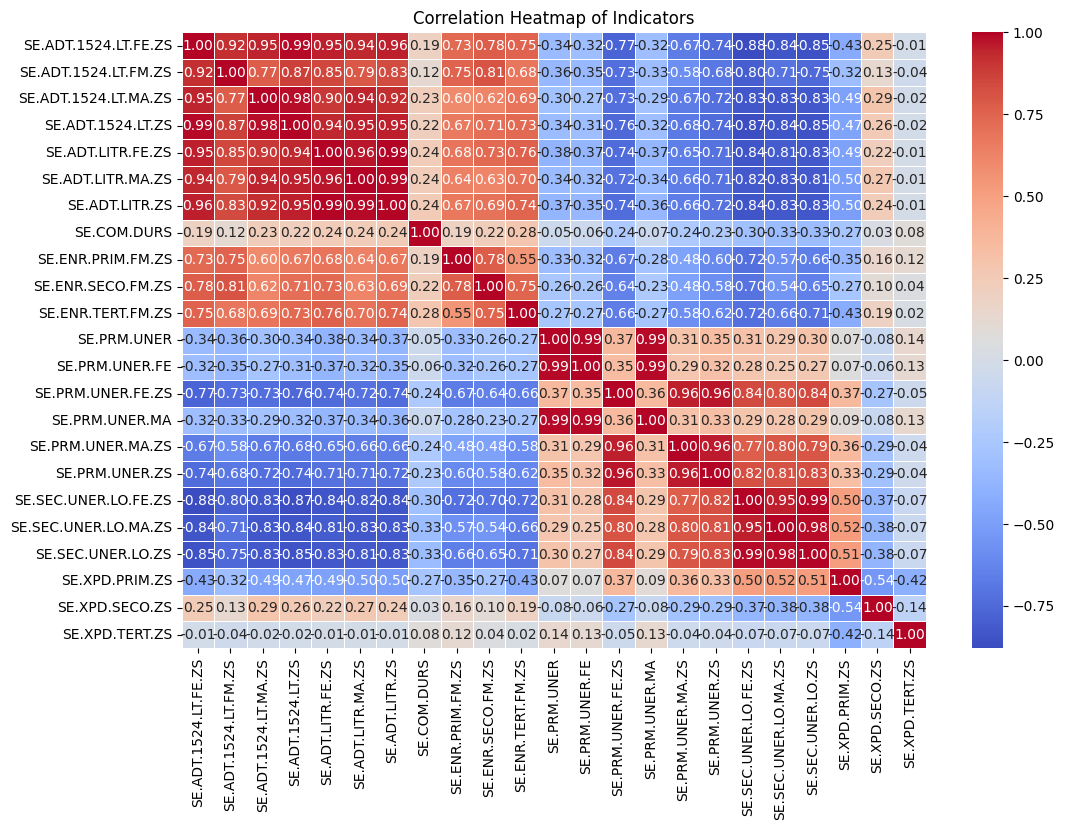

In [141]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Indicators")
plt.show()

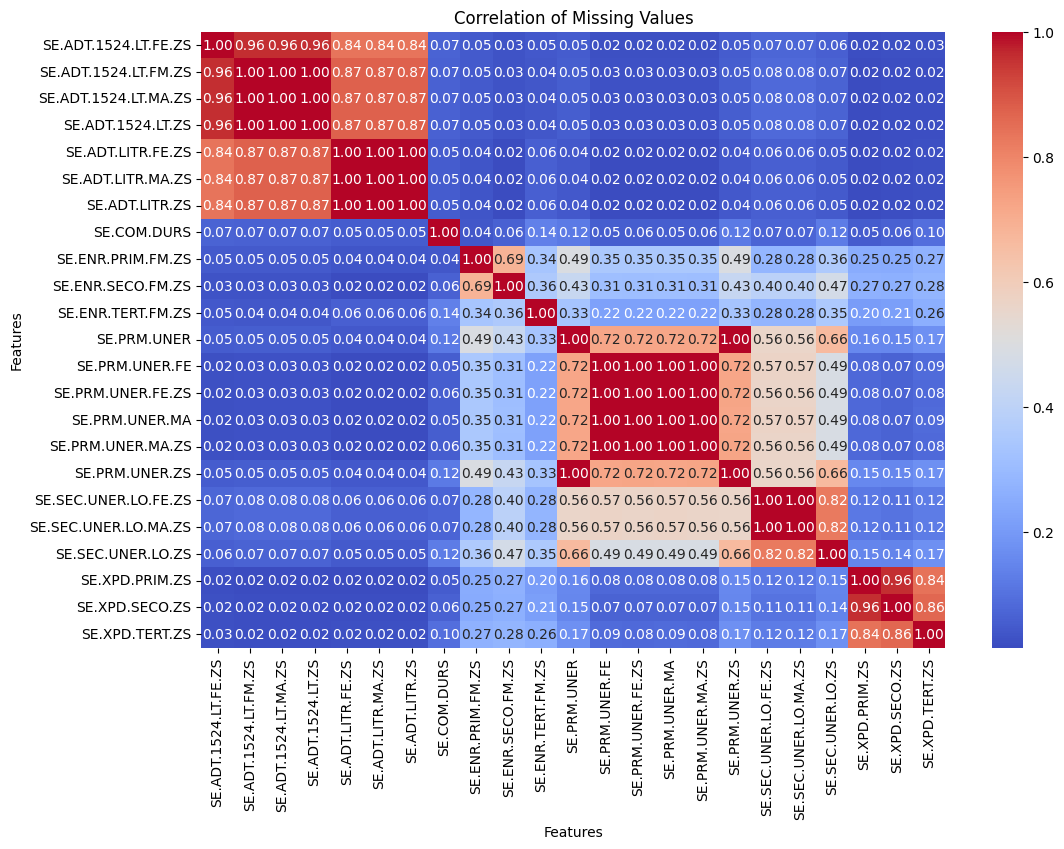

In [142]:
nan_corr = e_table.isna().astype(int).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nan_corr, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Missing Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

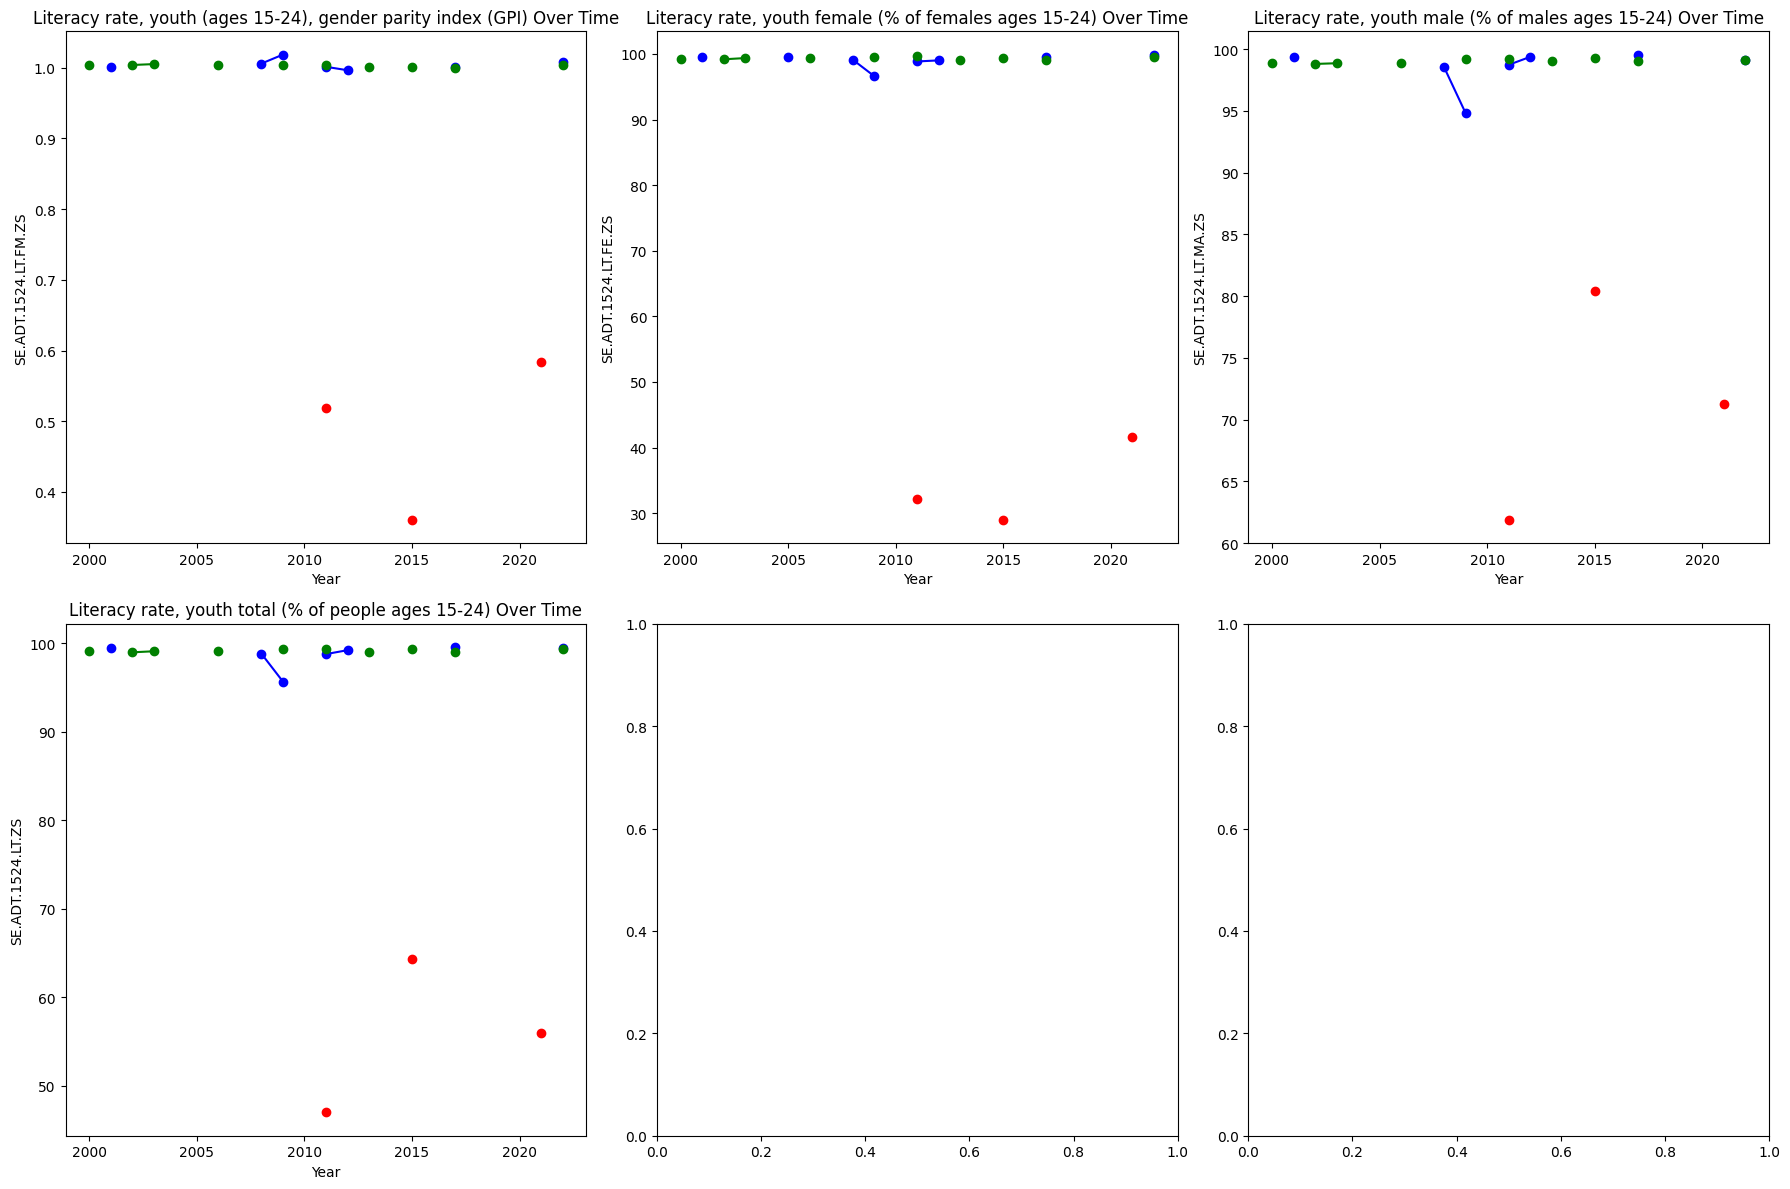

In [143]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(['SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.FE.ZS', 'SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.ZS']):
    axes[i].plot(e_table.loc['ALB'].index, e_table.loc['ALB'][column], marker='o', linestyle='-', color='blue')
    axes[i].plot(e_table.loc['AFG'].index, e_table.loc['AFG'][column], marker='o', linestyle='-', color='red')
    axes[i].plot(e_table.loc['CHL'].index, e_table.loc['CHL'][column], marker='o', linestyle='-', color='green')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{indicator_map[column]} Over Time')
plt.tight_layout()
plt.show()

#### Clearly these tables are corelated. we only need one of them. they are missing in the same spots as well. so we can confidently drop 2 of them. The GP Index is the one that is clearly more non linearly dependant on the rest of the columns:



In [144]:
drop_indic = ['SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.FE.ZS', 'SE.ADT.1524.LT.ZS']

lets look at similar trends:

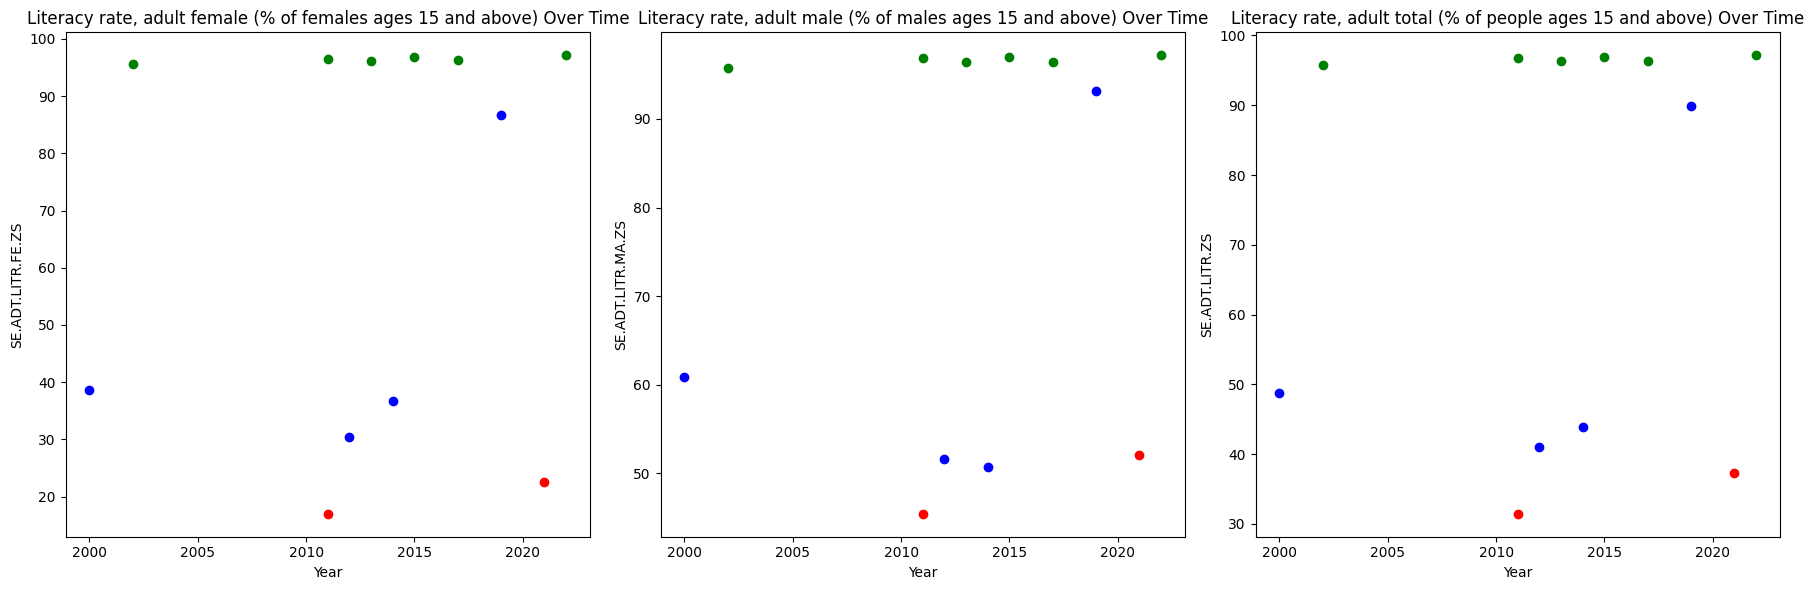

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, column in enumerate(['SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.ZS']):
    axes[i].plot(e_table.loc['CIV'].index, e_table.loc['CIV'][column], marker='o', linestyle='-', color='blue')
    axes[i].plot(e_table.loc['AFG'].index, e_table.loc['AFG'][column], marker='o', linestyle='-', color='red')
    axes[i].plot(e_table.loc['CHL'].index, e_table.loc['CHL'][column], marker='o', linestyle='-', color='green')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{indicator_map[column]} Over Time')
plt.tight_layout()
plt.show()

#### these are basicaly the same indicator. their values are smiliar, alongside thier missing values

In [146]:
drop_indic += ['SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS']

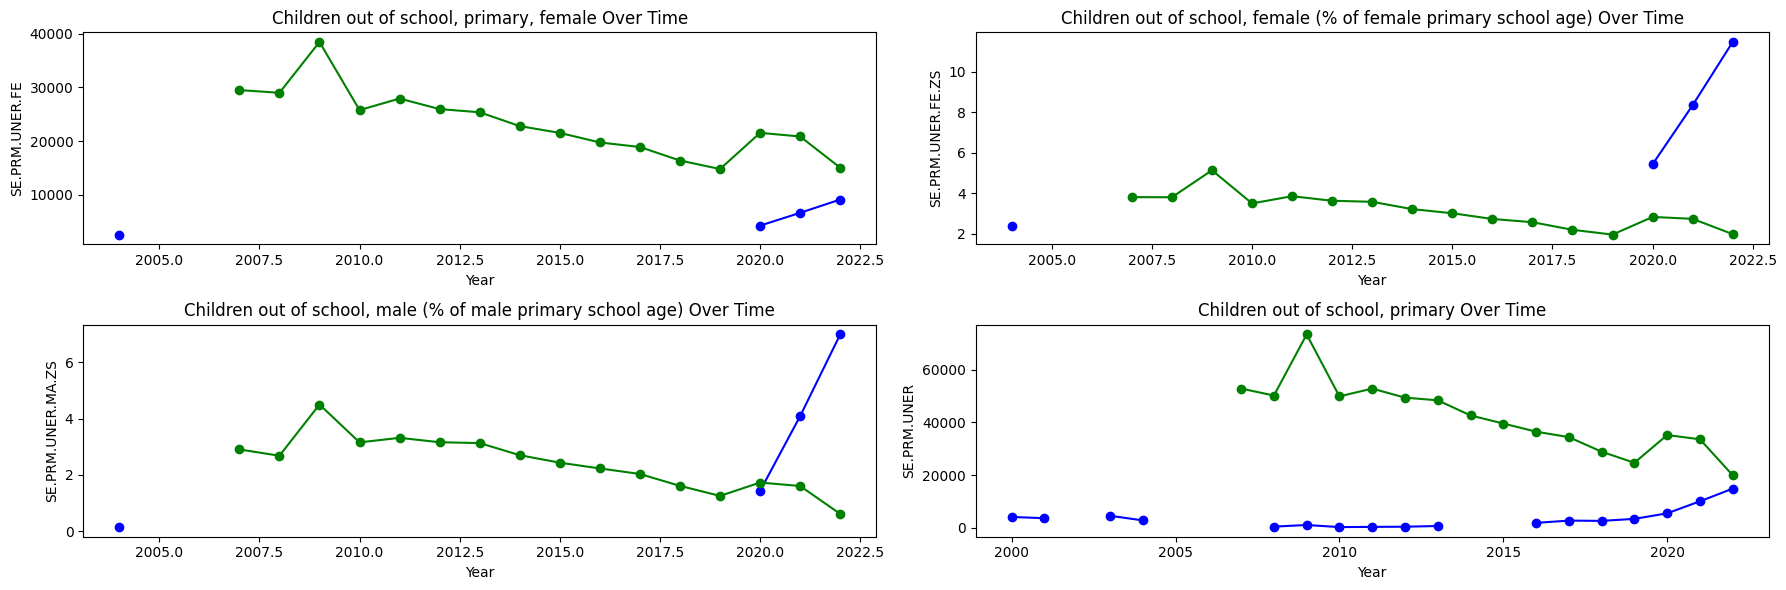

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(18, 6))
axes = axes.flatten()
for i, column in enumerate(['SE.PRM.UNER.FE', 'SE.PRM.UNER.FE.ZS','SE.PRM.UNER.MA.ZS', 'SE.PRM.UNER']):
    axes[i].plot(e_table.loc['ALB'].index, e_table.loc['ALB'][column], marker='o', linestyle='-', color='blue')
    axes[i].plot(e_table.loc['AFG'].index, e_table.loc['AFG'][column], marker='o', linestyle='-', color='red')
    axes[i].plot(e_table.loc['CHL'].index, e_table.loc['CHL'][column], marker='o', linestyle='-', color='green')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{indicator_map[column]} Over Time')
plt.tight_layout()
plt.show()

In [148]:
drop_indic += ['SE.PRM.UNER.FE','SE.PRM.UNER.MA', 'SE.PRM.UNER.MA.ZS', 'SE.PRM.UNER.FE.ZS']

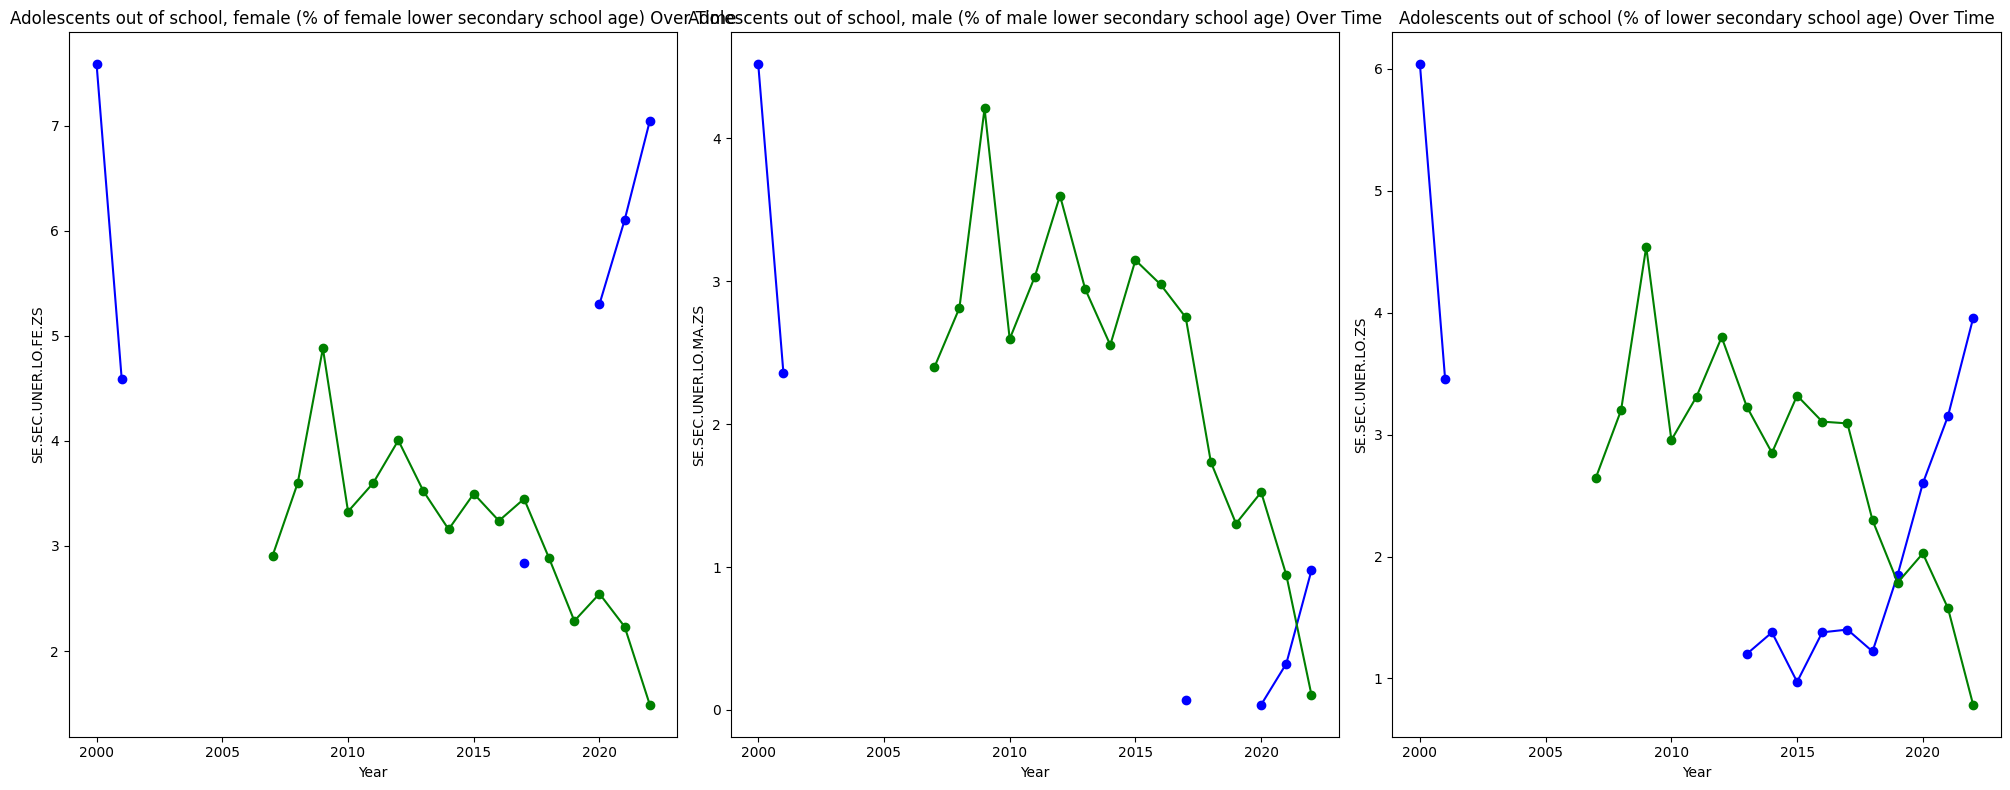

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for i, column in enumerate(['SE.SEC.UNER.LO.FE.ZS', 'SE.SEC.UNER.LO.MA.ZS', 'SE.SEC.UNER.LO.ZS']):
    axes[i].plot(e_table.loc['ALB'].index, e_table.loc['ALB'][column], marker='o', linestyle='-', color='blue')
    axes[i].plot(e_table.loc['AFG'].index, e_table.loc['AFG'][column], marker='o', linestyle='-', color='red')
    axes[i].plot(e_table.loc['CHL'].index, e_table.loc['CHL'][column], marker='o', linestyle='-', color='green')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{indicator_map[column]} Over Time')
plt.tight_layout()
plt.show()

In [150]:
drop_indic += ['SE.SEC.UNER.LO.MA.ZS', 'SE.SEC.UNER.LO.FE.ZS']

In [151]:
e_table = e_table.drop(columns=drop_indic)

In [152]:
mean_table = e_table.groupby("Country").mean(numeric_only=True)
mean_table = mean_table.apply(lambda x: x.fillna(x.mean()), axis=0)

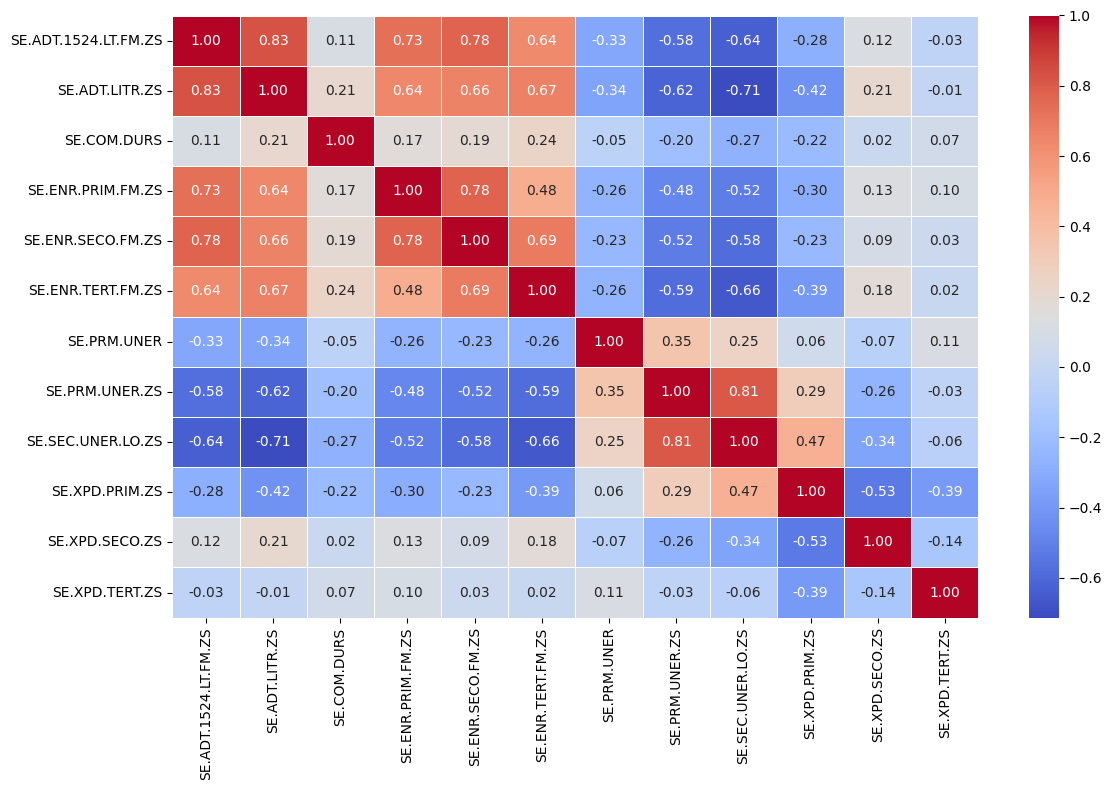

In [153]:
plt.figure(figsize=(12, 8))
# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
axes[0].set_title("Correlation Heatmap of Indicators (Mean)")
# Show the plot
plt.tight_layout()
plt.show()

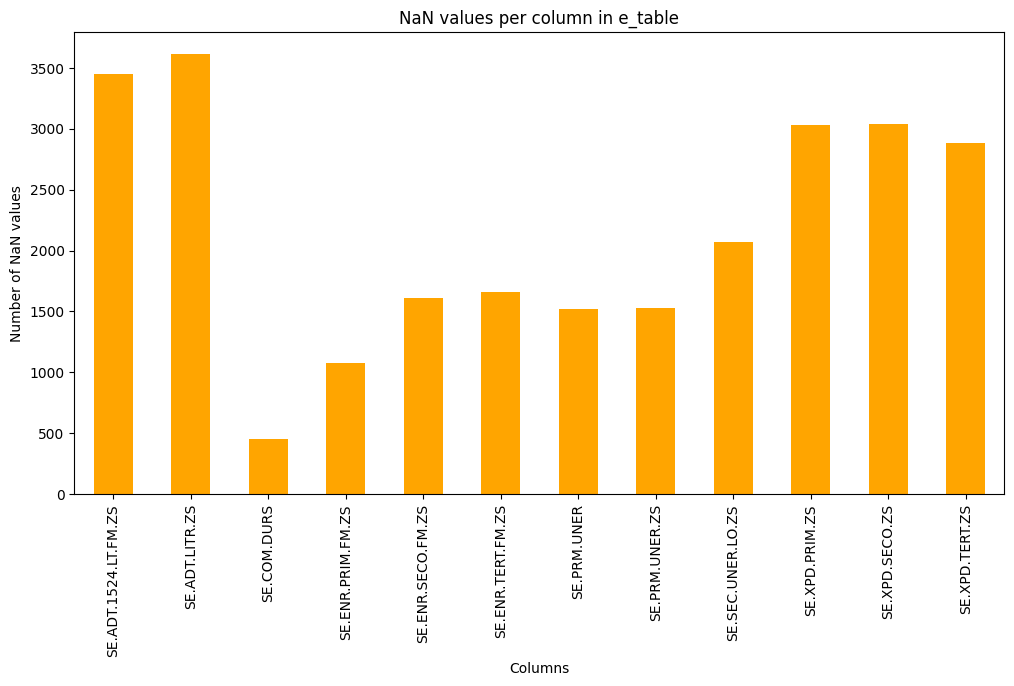

In [154]:
nan_counts = e_table.isna().sum()
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='orange')
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title('NaN values per column in e_table')
plt.xticks(rotation=90)
plt.show()

#### 

In [155]:
drop_indic2 = ["SE.ADT.1524.LT.FM.ZS", "SE.ADT.LITR.ZS", "SE.ENR.SECO.FM.ZS", "SE.SEC.UNER.LO.ZS"]
drop_indic += drop_indic2
e_table = e_table.drop(columns=drop_indic2)

In [156]:
mean_table = e_table.groupby("Country").mean(numeric_only=True)
mean_table = mean_table.apply(lambda x: x.fillna(x.mean()), axis=0)

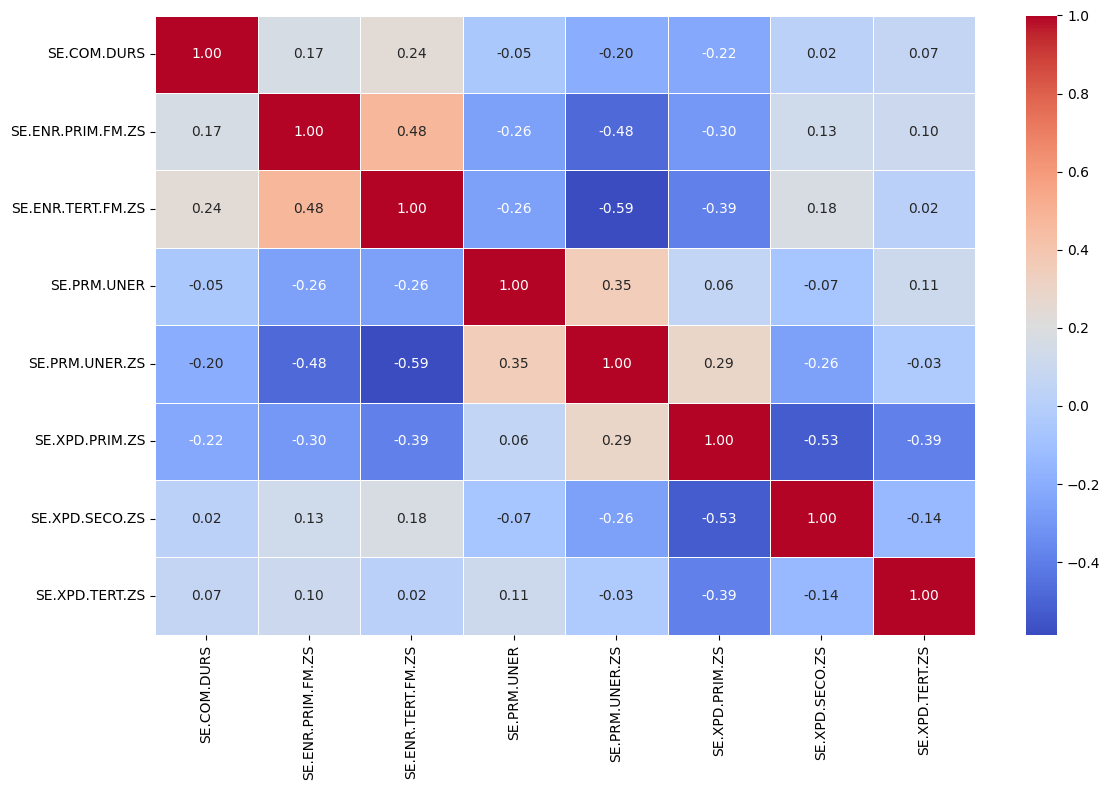

In [157]:
plt.figure(figsize=(12, 8))
# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
axes[0].set_title("Correlation Heatmap of Indicators (Mean)")
# Show the plot
plt.tight_layout()
plt.show()

edu_keep = e_table.columns

time for economics

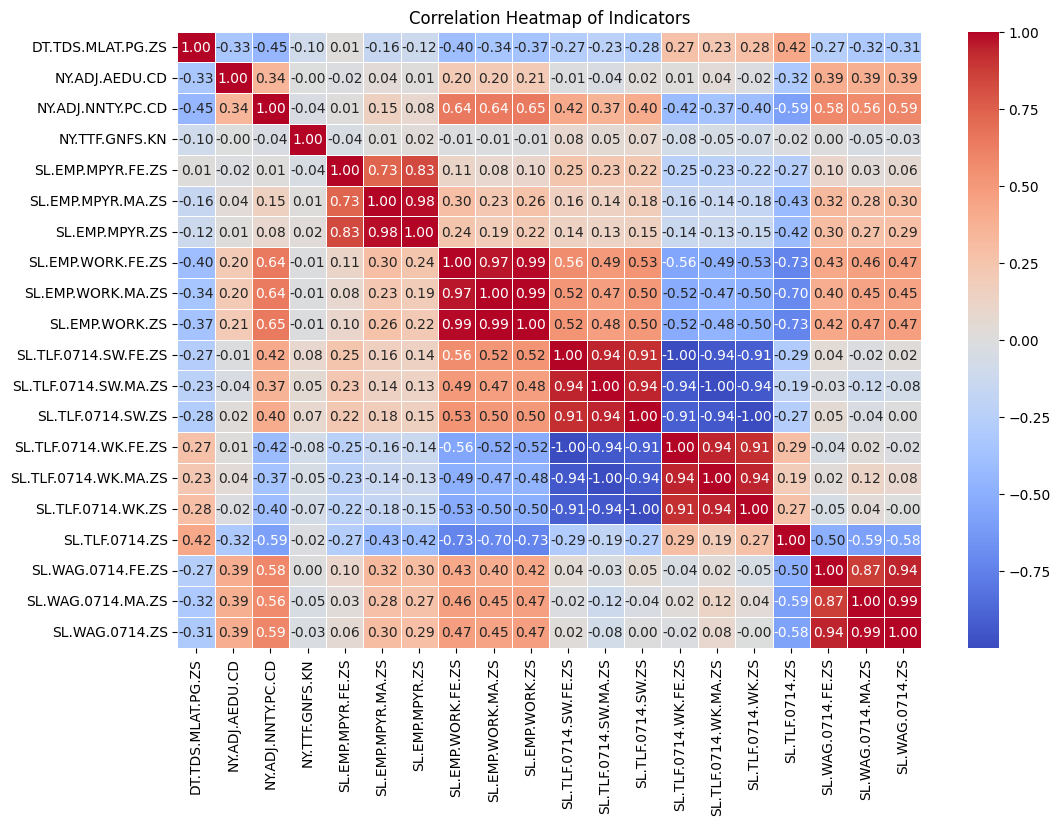

In [158]:
econ_table = table[table.columns.intersection(econ_ind.tolist())]
mean_table = econ_table.groupby("Country").mean(numeric_only=True)
# mean_table = mean_table.fillna(0)
mean_table.head()

plt.figure(figsize=(12, 8))
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Indicators")
plt.show()

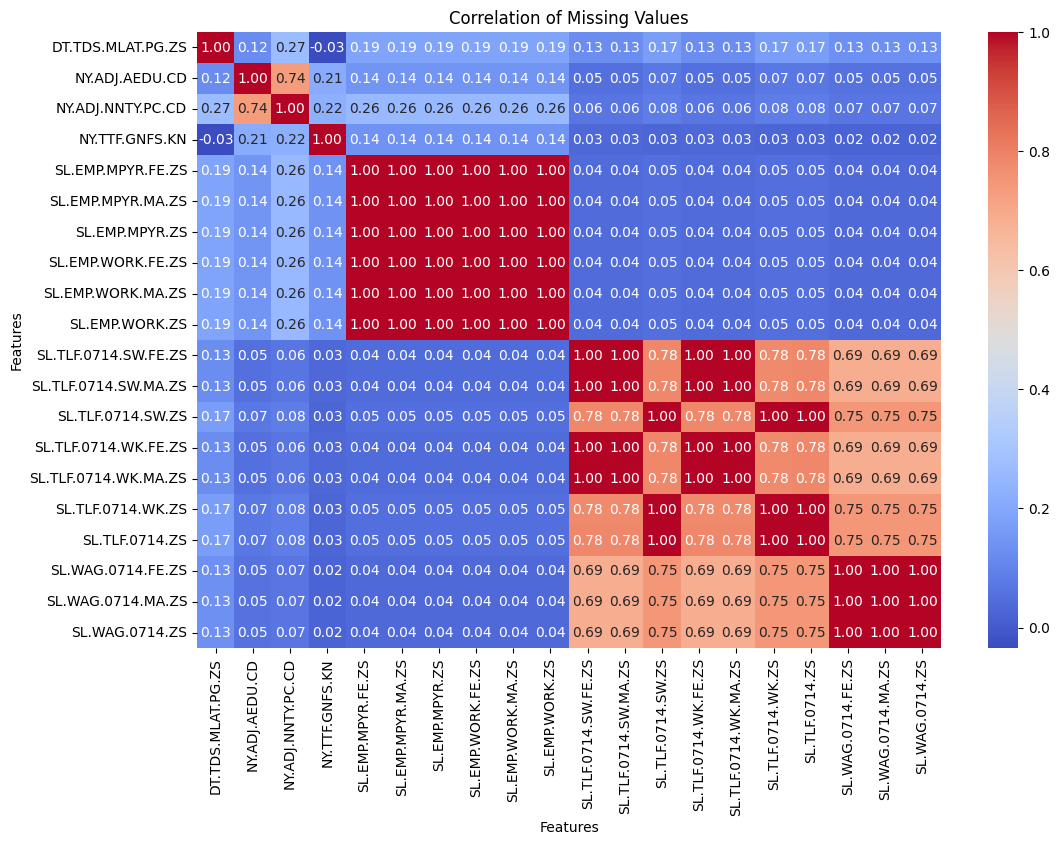

In [159]:
nan_corr = econ_table.isna().astype(int).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nan_corr, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Missing Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

we'll drop the columns that are linearly related and also are missing in the same time frames

In [160]:
drop_ind_econ = ['SL.WAG.0714.MA.ZS', 'SL.WAG.0714.ZS', 'SL.TLF.0714.SW.FE.ZS', 
                 'SL.TLF.0714.SW.ZS', 'SL.TLF.0714.WK.FE.ZS', 'SL.TLF.0714.WK.MA.ZS',
                 'SL.TLF.0714.WK.ZS']

drop_ind_econ += ['SL.EMP.WORK.MA.ZS', 'SL.EMP.WORK.FE.ZS']
drop_ind_econ += ['SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS']

In [161]:
econ_table = econ_table.drop(columns=drop_ind_econ)

In [162]:
mean_table = econ_table.groupby("Country").mean(numeric_only=True)
mean_table = mean_table.apply(lambda x: x.fillna(x.mean()), axis=0)

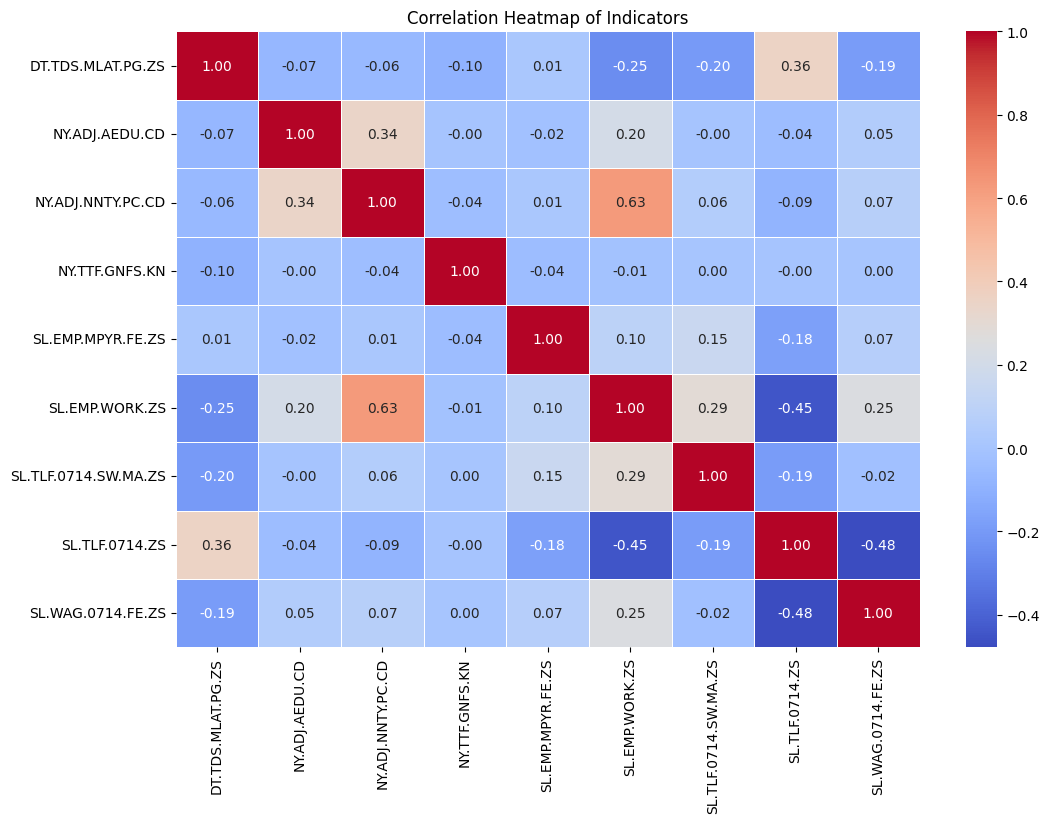

In [163]:
plt.figure(figsize=(12, 8))
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Indicators")
plt.show()

econ_keep = econ_table.columns

In [164]:
health_topics = indicator_names[indicator_names['Topic'].str.contains("Health", na=False)]['Topic'].drop_duplicates().values
h_ind = indicator_names[indicator_names['Topic'].str.contains("Health", na=False)]['Indicator Code'].drop_duplicates().values

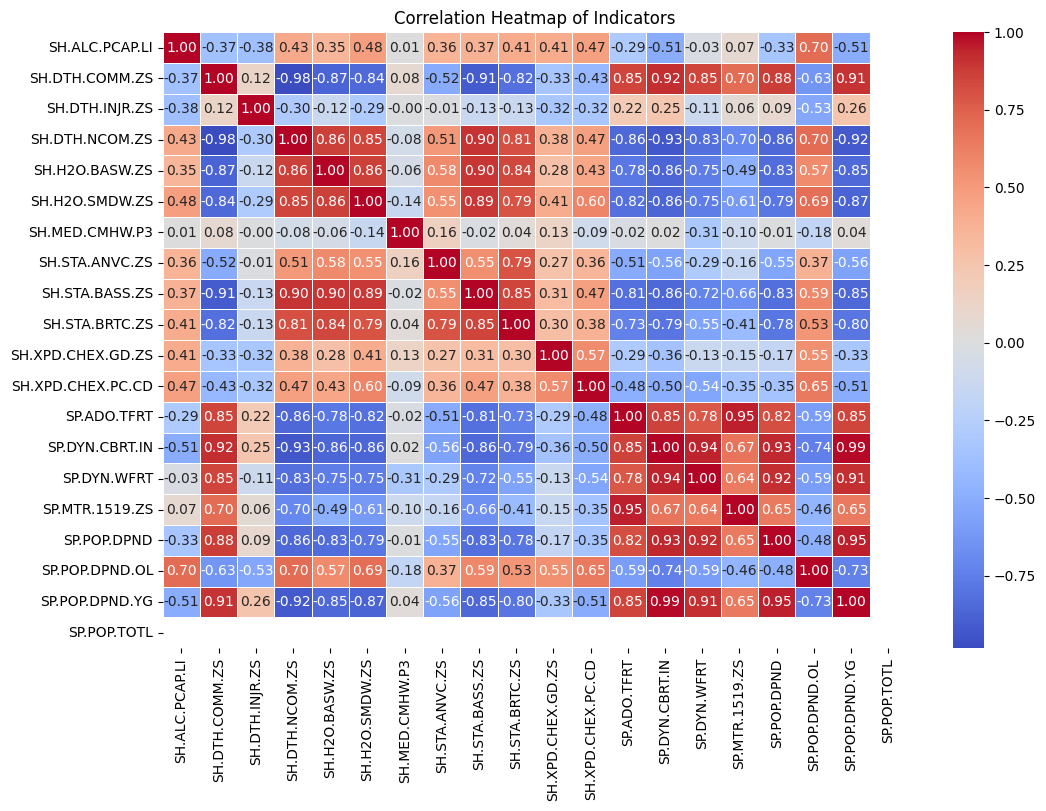

In [165]:
h_table = table[table.columns.intersection(h_ind.tolist())]
mean_table = h_table.groupby("Country").mean(numeric_only=True)
# mean_table = mean_table.fillna(0)
mean_table.head()

plt.figure(figsize=(12, 8))
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Indicators")
plt.show()

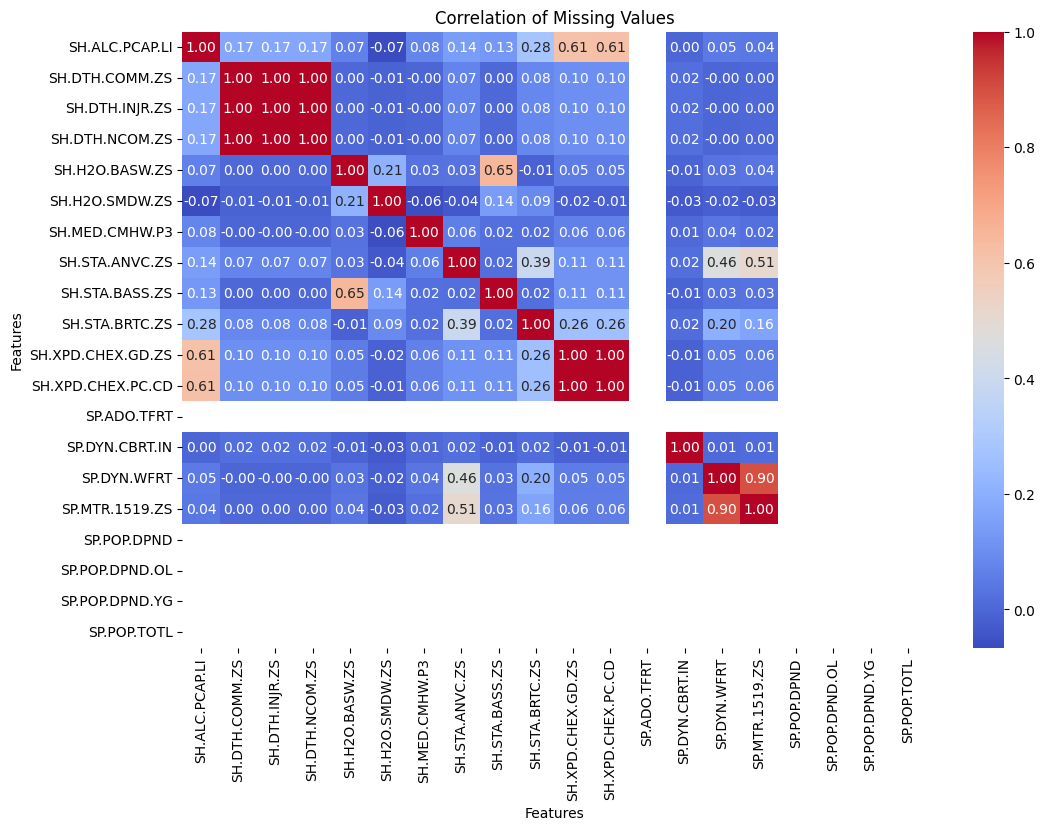

In [166]:
nan_corr = h_table.isna().astype(int).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(nan_corr, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Missing Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

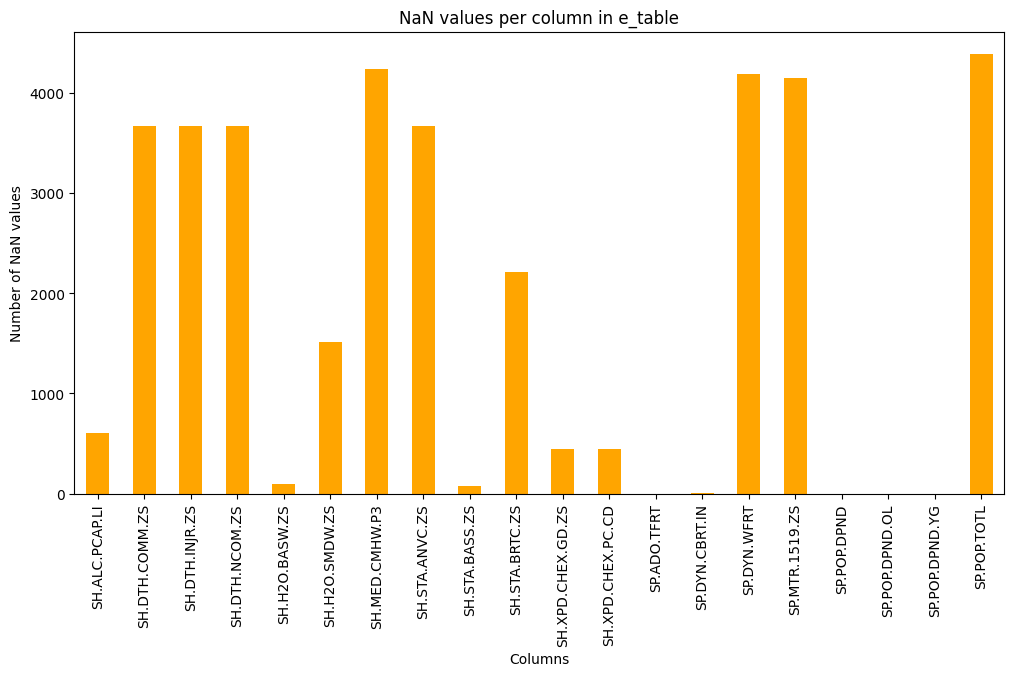

In [167]:
nan_counts = h_table.isna().sum()
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='orange')
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title('NaN values per column in e_table')
plt.xticks(rotation=90)
plt.show()

In [168]:
drop_indc_h = ['SP.POP.TOTL', 'SP.ADO.TFRT', 'SP.DYN.WFRT', 'SP.DYN.WFRT', 'SP.MTR.1519.ZS', 'SP.POP.DPND', 'SP.POP.DPND.YG',
               'SH.H2O.SMDW.ZS', 'SH.DTH.NCOM.ZS', 'SH.DTH.NCOM.ZS', 'SH.STA.ANVC.ZS', 'SH.STA.BRTC.ZS', 'SH.DTH.COMM.ZS', 'SH.MED.CMHW.P3']

In [169]:
h_table = h_table.drop(columns=drop_indc_h)

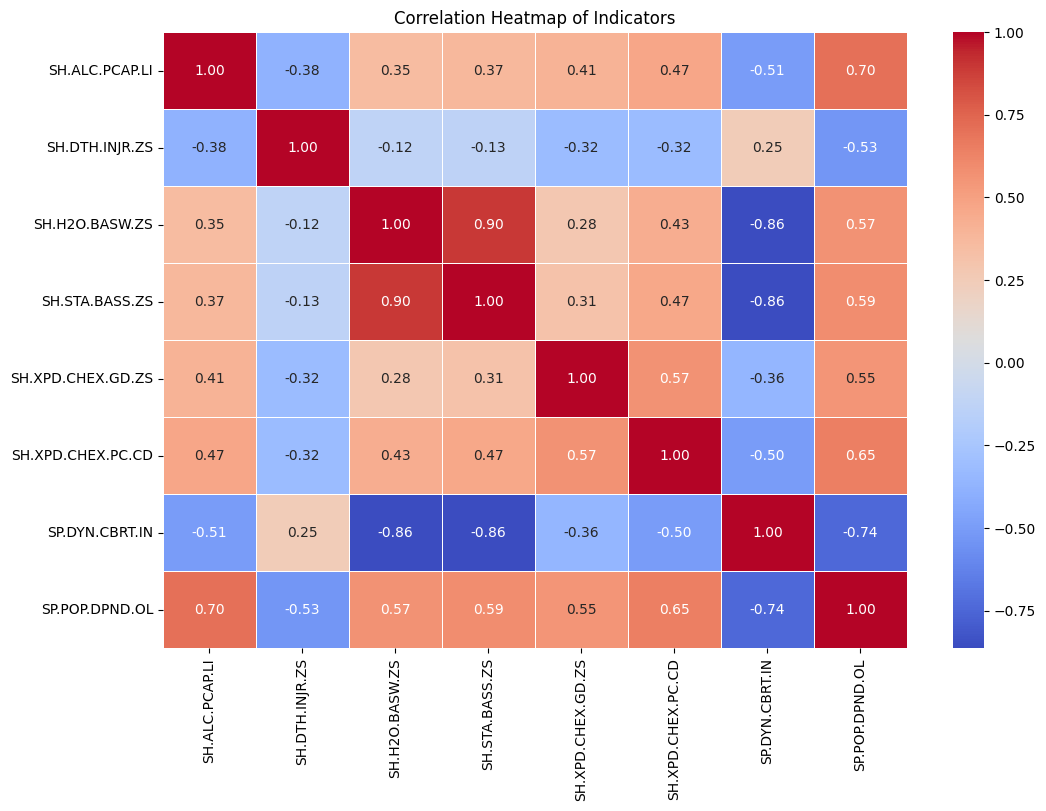

In [170]:
mean_table = h_table.groupby("Country").mean(numeric_only=True)
# mean_table = mean_table.fillna(0)
mean_table.head()

plt.figure(figsize=(12, 8))
sns.heatmap(mean_table.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Indicators")
plt.show()

health_keep = h_table.columns

# Time series

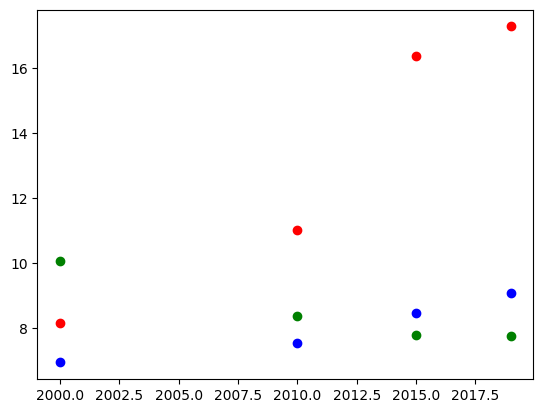

In [172]:
column = 'SH.DTH.INJR.ZS'
plt.plot(h_table.loc['AGO'].index, h_table.loc['AGO'][column], marker='o', linestyle='-', color='blue')
plt.plot(h_table.loc['AFG'].index, h_table.loc['AFG'][column], marker='o', linestyle='-', color='red')
plt.plot(h_table.loc['CHL'].index, h_table.loc['CHL'][column], marker='o', linestyle='-', color='green')
plt.show()

In [174]:
from statsmodels.tsa.arima.model import ARIMA

def fill_missing_with_arima(df, col):
    """
    Fill missing values in a specific column using ARIMA time series forecasting.
    Works for each country separately.
    """
    df = df.copy()
    
    for country in df.index.get_level_values(0).unique():
        country_data = df.loc[country, col]
        country_data = country_data.reset_index()
        country_data = country_data.set_index('Year')
        country_data = country_data.sort_index()
        if country_data[col].isna().all():
            continue
        country_data[col] = country_data[col].interpolate()
        missing_indices = country_data[col].isna()
        
        if missing_indices.sum() == 0:
            df.loc[country, col] = country_data[col].values
            continue  # No missing values left, move to next country

        # Differencing to check stationarity
        country_data['diff'] = country_data[col].diff()

        # Fit ARIMA only on non-null values
        model = ARIMA(country_data[col].dropna(), order=(1,1,1))  # ARIMA(1,1,1) for differencing
        model_fit = model.fit()

        # Predict missing values
        for year in country_data.index[missing_indices]:
            forecast = model_fit.predict(start=year, end=year)
            country_data.loc[year, col] = forecast.iloc[0]

        # Store back into original dataframe
        df.loc[country, col] = country_data[col].values

    return df


filled_data = fill_missing_with_arima(h_table, column)


In [175]:
keep = econ_keep.values.tolist() + edu_keep.values.tolist() + health_keep.values.tolist()

In [176]:
df = table[keep]

In [177]:
print(df.isna().sum().sum() / df.shape[0]  / df.shape[1])

0.3367630320965172


In [ ]:
import warnings
warnings.filterwarnings("ignore")

df_filled = df.copy()
for c in tqdm(df.columns):
    try:
        df_filled = fill_missing_with_arima(df_filled, c)
    except:
        print(" failed filling the table for column: " + str(c))


 40%|████      | 10/25 [00:30<01:04,  4.28s/it]

 failed filling the table for column: SE.COM.DURS


 52%|█████▏    | 13/25 [00:42<00:48,  4.04s/it]

 failed filling the table for column: SE.PRM.UNER


 56%|█████▌    | 14/25 [00:45<00:41,  3.74s/it]

 failed filling the table for column: SE.PRM.UNER.ZS


 60%|██████    | 15/25 [00:53<00:50,  5.09s/it]